In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score 
from nltk.corpus import stopwords
import re
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
tokenized_project = [project.split() for project in new_corpus_customsp]

In [ ]:
tokenized_project

[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(tokenized_project, size=100, min_count=1, window=5, iter=50)

In [ ]:
model.wv['machine']

array([ 0.5604232 ,  0.489484  ,  1.067284  , -0.24397431, -0.15681243,
       -0.5085031 ,  0.5758411 , -1.378801  , -0.07221707, -1.1465639 ,
       -0.47440138,  0.979301  , -1.3326261 , -0.6319953 ,  0.29912683,
       -0.7242112 , -0.18627949,  0.3109047 , -0.16499957, -0.6689279 ,
        0.059683  ,  0.47298482, -0.13118073,  0.8992553 , -0.22865793,
        0.91921043, -0.26343066,  0.09863456,  0.2768764 , -0.91457206,
       -1.54726   ,  0.67257625,  0.5837131 ,  0.29874256,  0.36515534,
        0.5513989 , -1.6344628 , -0.25749147, -1.646905  , -0.11999878,
       -0.2676878 ,  0.18786095,  0.6725835 , -0.93889976, -1.0845219 ,
       -0.57582134,  0.7753532 ,  0.04613622, -0.3059899 , -0.71379685,
        0.5710844 ,  0.9736856 ,  0.19964495,  0.24738961,  0.67367536,
        0.35955563, -0.2322916 ,  0.6297754 ,  0.63561136,  1.0257765 ,
       -1.8328003 ,  0.25169542, -0.04425896, -0.48176554,  0.791956  ,
        0.09506115,  0.43293926,  1.0408286 ,  0.6403824 , -1.78

In [ ]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
X=[]
for sentence in tokenized_project:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X)
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[array([ 0.3120644 , -0.34633076,  0.2661397 ,  0.05146028,  0.15698059,
       -0.25907144,  0.09857   , -0.58965933, -0.5121017 , -0.38531944,
       -0.05480068,  0.3073713 , -0.38474295, -0.14905116, -0.08556502,
       -0.13062887, -0.13411123,  0.10838064, -0.17063072, -0.45292842,
       -0.07737038, -0.16978519,  0.05760632,  0.16733982, -0.11022016,
        0.13448529, -0.11074185, -0.17283857,  0.40908745, -0.16406687,
       -0.4219749 ,  0.08692367,  0.24315274, -0.04841284,  0.1547181 ,
       -0.02983574, -0.5728688 ,  0.06238155, -0.56172484,  0.01770999,
        0.06356189,  0.09368996,  0.39840898, -0.04624644, -0.19695532,
        0.00345779,  0.13684718,  0.14698021, -0.16375916, -0.11820251,
       -0.17341411,  0.23410136,  0.1842801 , -0.04069879, -0.06391685,
       -0.18112898, -0.4449548 ,  0.3610834 ,  0.0987375 ,  0.38863274,
       -0.28717402,  0.29995987, -0.09873944, -0.15111734,  0.2835835 ,
        0.13755338,  0.20972109,  0.05152617,  0.2534673 , -0.3

In [ ]:
len(X)

628

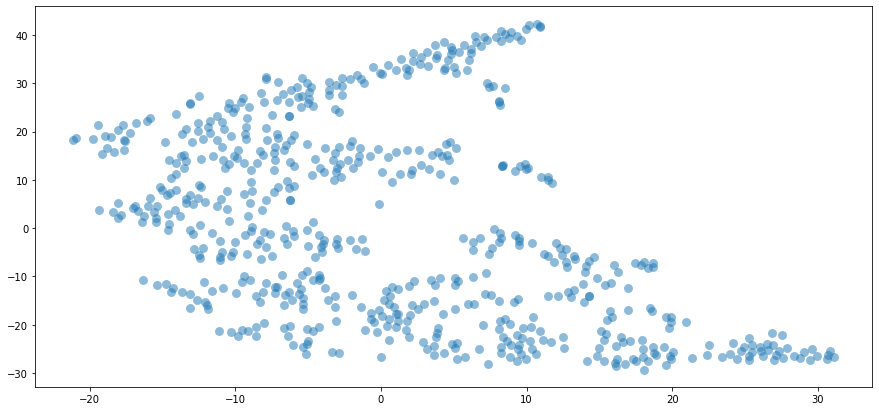

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(X, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


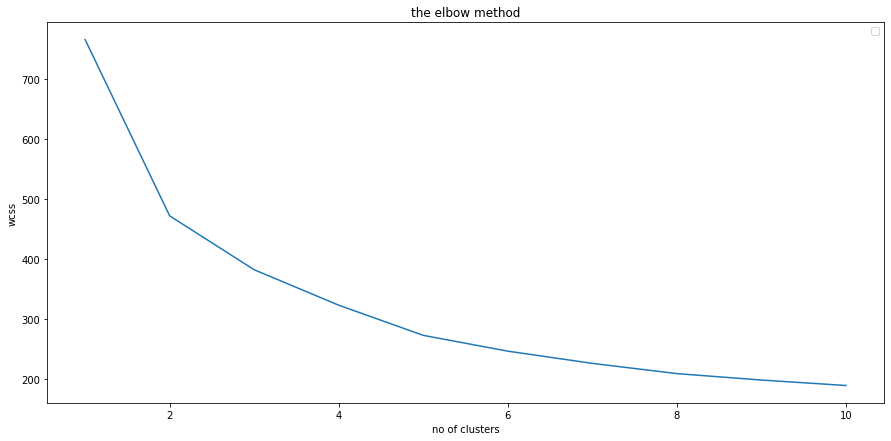

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 1 1 3 1 3 1 1 1 1 3 3 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 3 1 3 3 1 1 3 1 1
 3 3 0 1 2 2 1 1 1 3 3 1 1 3 0 0 1 1 1 0 1 3 3 3 2 0 3 1 1 4 4 3 3 3 1 3 3
 0 1 0 3 2 3 3 1 2 3 2 1 1 1 0 1 1 3 3 3 1 0 1 1 1 1 3 3 1 1 3 0 3 3 1 1 1
 1 0 1 3 2 4 1 1 1 1 3 3 1 1 1 1 4 1 1 0 3 1 3 1 3 1 0 3 1 1 3 1 1 1 3 1 3
 1 1 4 4 1 0 1 3 3 3 1 0 1 1 2 2 0 1 0 1 1 1 1 1 4 4 4 3 1 1 3 1 1 3 4 1 1
 1 1 2 1 1 1 0 1 4 4 3 1 1 1 1 3 3 3 1 0 3 1 3 1 1 1 2 0 0 2 0 1 2 2 2 4 1
 2 1 1 3 2 3 3 1 2 2 3 0 1 1 1 3 3 1 1 2 1 1 1 1 1 1 1 4 4 1 1 4 3 0 1 3 2
 1 2 3 1 3 1 1 3 1 2 1 4 0 1 3 1 1 2 3 3 0 1 4 3 3 3 1 2 3 2 1 1 3 1 3 1 2
 1 3 3 1 4 4 3 3 3 4 1 4 3 1 3 4 4 1 1 3 1 2 1 4 2 1 3 1 4 4 2 1 1 1 3 4 3
 4 1 1 1 1 1 1 1 2 3 2 1 1 3 3 1 1 1 3 3 2 1 1 4 1 2 2 3 3 3 3 0 3 3 1 3 4
 1 1 3 0 3 2 3 1 1 1 1 0 4 1 3 2 1 1 1 4 1 1 1 3 4 1 3 1 1 1 1 3 1 1 1 1 1
 3 1 3 1 1 0 1 1 1 0 0 1 1 0 1 1 0 2 0 4 1 3 3 0 1 1 1 0 2 3 0 2 4 1 1 1 4
 1 1 1 1 1 1 1 0 1 1 1 3 3 1 3 1 1 1 4 1 1 4 3 3 1 3 3 3 1 1 4 1 3 1 1 2 1
 0 0 1 3 1 1 1 1 1 1 1 1 

In [ ]:
len(y_kmeans)

628

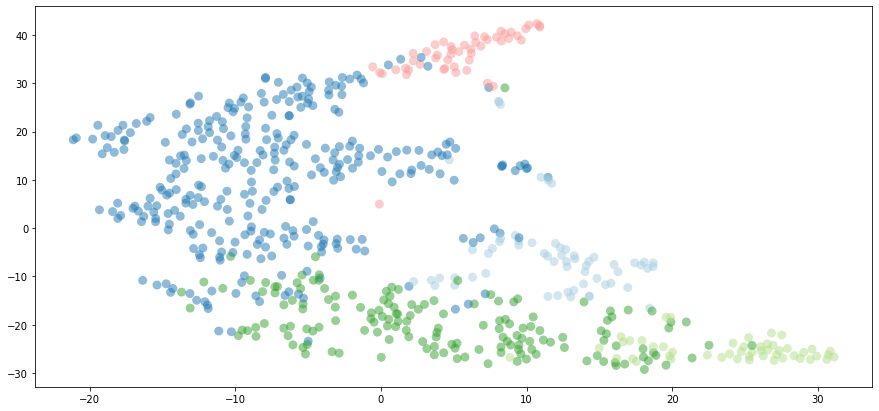

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[X] if X >= 0
                  else (0.5, 0.5, 0.5)
                  for X in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(X) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(X, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.43102133
For no of clusters = 3  The average silhouette_score is : 0.3263166
For no of clusters = 4  The average silhouette_score is : 0.33773926
For no of clusters = 5  The average silhouette_score is : 0.33308482
For no of clusters = 6  The average silhouette_score is : 0.27072468
For no of clusters = 7  The average silhouette_score is : 0.27325785
For no of clusters = 8  The average silhouette_score is : 0.27717626
For no of clusters = 9  The average silhouette_score is : 0.26940438
For no of clusters = 10  The average silhouette_score is : 0.22280183


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

60

In [ ]:
#projects in cluster 1
list1

['reviews cleaning visualization predicting sentiments reviews algorithms multinomial naive baye python accuracy end end web app link https tinyurl com sentiment',
 'top headlines date cleaning visualization predicting stock price news headlines algorithms logistic regression random forest multinomial naive bayes python accuracy',
 'sms messages cleaning visualization predicting sms spam ham algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com spam sms detector',
 'taken kaggle com news headlines cleaning visualization predicting news fake algorithms logistic regression multinomial naive bayes python accuracy',
 'taken kaggle com movie scripts script words associated genre cleaning visualization predicting genre movie words script algorithms multinomial naive bayes python accuracy end end web app link https tinyurl com movie genre classifier',
 'independent features exploratory analysis cleaning visualization models classifying diabetes algorithms l

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
4                algorithms  0.088669
106              regression  0.072730
103                  random  0.060396
24           classification  0.058897
100                  python  0.057927
0                  accuracy  0.055199
52                   forest  0.054554
104           random forest  0.054554
70      logistic regression  0.050852
69                 logistic  0.050852
8                  analysis  0.050100
65                   linear  0.049728
78                   models  0.048776
63                     like  0.048623
49                 features  0.046407
46                  feature  0.043111
97               prediction  0.042964
34                 decision  0.041401
28                 cleaning  0.039940
121                     svm  0.039703
96               predicting  0.039595
116                     set  0.039134
25               classifier  0.038735
43              exploratory  0.037599
44     exploratory analysis  0.037599
136           visualization  0.037576
62                 learning  0.037314
131                    tree  0.036480
86                    naive  0.035900
16                    bayes  0.035535
125                    text  0.035344
77                       ml  0.035201
87              naive bayes  0.034574
35            decision tree  0.034492
26                 classify  0.032781
135                     vec  0.028888
66        linear regression  0.028632
112                   sales  0.028131
21                    churn  0.028123
29   cleaning visualization  0.026988

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of reviews is : 2
Frequency of cleaning is : 13
Frequency of visualization is : 12
Frequency of predicting is : 12
Frequency of sentiments is : 1
Frequency of algorithms is : 31
Frequency of multinomial is : 5
Frequency of naive is : 11
Frequency of baye is : 1
Frequency of python is : 19
Frequency of accuracy is : 23
Frequency of end is : 8
Frequency of web is : 5
Frequency of app is : 4
Frequency of link is : 5
Frequency of https is : 4
Frequency of tinyurl is : 3
Frequency of com is : 6
Frequency of sentiment is : 2
Frequency of top is : 1
Frequency of headlines is : 3
Frequency of date is : 1
Frequency of stock is : 5
Frequency of price is : 6
Frequency of news is : 5
Frequency of logistic is : 21
Frequency of regression is : 31
Frequency of random is : 24
Frequency of forest is : 21
Frequency of bayes is : 11
Frequency of sms is : 3
Frequency of messages is : 1
Frequency of spam is : 4
Frequency of ham is : 1
Frequency of detector is : 1
Frequency of taken is : 3
Frequen

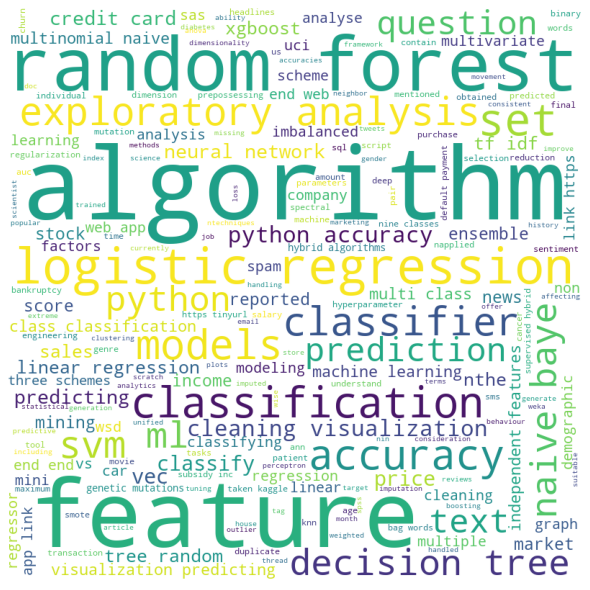

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

311

In [ ]:
list2

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'analyzing millions financial fraudulent hand audit analyt

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
23         analysis  0.022517
532          python  0.021577
17        algorithm  0.020985
669            time  0.020694
222        features  0.017325
608             set  0.016235
349            like  0.015443
295           image  0.014424
337        language  0.012272
252            game  0.012201
497        platform  0.012076
524      processing  0.011627
18       algorithms  0.010857
155        designed  0.010832
269             gui  0.010568
662            test  0.010558
444            nthe  0.010018
347         library  0.009772
720             web  0.009576
245       framework  0.009470
343        learning  0.009382
549  recommendation  0.009337
34              app  0.009323
474      parameters  0.009159
408          models  0.009106
615          simple  0.008969
691      university  0.008905
324            java  0.008633
536       questions  0.008374
196          engine  0.008362

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 6
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 4
Frequency of forging is : 1
Frequency of companys is : 3
Frequency of comparison is : 2
Frequency of peers is : 2
Frequency of fundamental is : 1
Frequency of analysis is : 46
Frequency of financial is : 13
Frequency of statements is : 2
Frequency of calculated is : 5
Frequency of relevant is : 5
Frequency of ratios is : 2
Frequency of evaluate is : 2
Frequency of status is : 2
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 8
Frequency of best is : 12
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 2
Frequency of forge is : 1
Frequency of psnr is : 1
Frequency of currently is : 5
Frequency of drafting is : 1
Frequency of paperforthe is : 1
Frequency of algorithm is : 41
Frequency of reconstruction is : 5
Frequency of k is : 10
Frequency of space is : 6
Frequency of superresolution is : 1
Frequency of images 

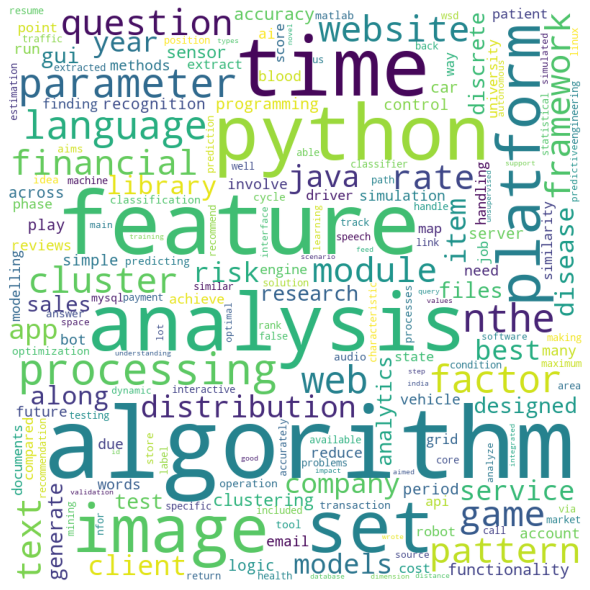

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

50

In [ ]:
list3

['works network embedding consider network structure generated could potentially nhelpful learning joint network representation aims embed network nodes latent dimensional space keeping mind following properties embeddings also able capture structure network embeddings account generated attributes node node representations follow free property networks',
 'works network embedding consider network structure generated could potentially nhelpful learning joint network representation aims embed network nodes latent dimensional space keeping mind following properties embeddings also able capture structure network embeddings account generated attributes node node representations follow free property networks',
 'multiple modules deep learning networks like cnn rnn gru lstm multiple assignments applying deep learning network models nfashionmnist multi class natural image classification cifar',
 'densenet keras augmentation transfer learning trained image epochs accuracy total epochs',
 'solut

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
29                images  0.128653
41               network  0.126126
44                neural  0.119520
31              learning  0.110373
28                 image  0.099520
14                  deep  0.096635
61               trained  0.094771
45        neural network  0.092103
15         deep learning  0.077177
43              networks  0.074571
9                    cnn  0.061159
46       neural networks  0.058215
1               accuracy  0.055902
7         classification  0.054986
24              generate  0.053066
12         convolutional  0.051374
56            tensorflow  0.050683
4           architecture  0.044794
30                 keras  0.043926
13  convolutional neural  0.043828
50                python  0.041848
8               classify  0.041229
3             algorithms  0.040939
36      machine learning  0.038917
35               machine  0.038917
10           convolution  0.037573
62        trained neural  0.037152
6                  class  0.036958
34                  lstm  0.036480
37                models  0.034191

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of works is : 2
Frequency of network is : 41
Frequency of embedding is : 3
Frequency of consider is : 2
Frequency of structure is : 4
Frequency of generated is : 5
Frequency of could is : 2
Frequency of potentially is : 2
Frequency of nhelpful is : 2
Frequency of learning is : 30
Frequency of joint is : 2
Frequency of representation is : 2
Frequency of aims is : 2
Frequency of embed is : 2
Frequency of nodes is : 2
Frequency of latent is : 2
Frequency of dimensional is : 2
Frequency of space is : 2
Frequency of keeping is : 2
Frequency of mind is : 2
Frequency of following is : 2
Frequency of properties is : 2
Frequency of embeddings is : 6
Frequency of also is : 5
Frequency of able is : 4
Frequency of capture is : 2
Frequency of account is : 2
Frequency of attributes is : 2
Frequency of node is : 5
Frequency of representations is : 2
Frequency of follow is : 2
Frequency of free is : 2
Frequency of property is : 2
Frequency of networks is : 16
Frequency of multiple is : 2
Fre

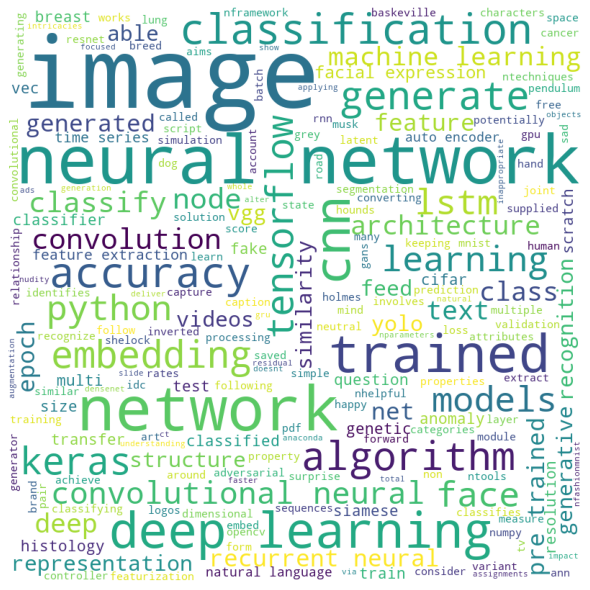

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

157

In [ ]:
list4

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'beat baseline score credibility prediction events credbank initial exploratory analysis multi hierarchical attention network operating tweet plan hierarchical transformer encoder decoder architecture improve',
 'end end pipeline abnormalitie

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
125             image  0.058289
148          learning  0.054743
175           network  0.041227
154           machine  0.040807
279           trained  0.040578
178            neural  0.036295
166            models  0.035024
128            images  0.032560
143          language  0.032084
155  machine learning  0.031462
66               deep  0.030834
153              lstm  0.029216
67      deep learning  0.027759
213        processing  0.026248
2            accuracy  0.026128
280          training  0.025962
150              like  0.024807
179    neural network  0.024338
272              text  0.023915
42     classification  0.023476
7           algorithm  0.023022
214            python  0.022595
177          networks  0.022303
224       recognition  0.022264
48                cnn  0.021933
256             state  0.021535
100          features  0.020901
273              time  0.020764
14       architecture  0.019296
215           pytorch  0.018263

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 3
Frequency of duplication is : 1
Frequency of faces is : 4
Frequency of major is : 5
Frequency of challenges is : 2
Frequency of dup is : 1
Frequency of algorithm is : 16
Frequency of complexity is : 1
Frequency of means is : 4
Frequency of time is : 16
Frequency of get is : 7
Frequency of answer is : 4
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 6
Frequency of solved is : 3
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 2
Frequency of achieve is : 5
Frequency of tradeoff is : 1
Frequency of precision is : 4
Frequency of recall is : 3
Frequency of improves is : 1
Frequency of score is : 8
Frequency of machine is : 28
Frequency of learning is : 63
Frequency of collecting is : 1
Frequency of training is : 21
Frequency of accuracy is : 24
Frequency of classification is : 21
Frequency of basis is : 2
Frequency of position is : 3
Frequency of camera is : 6
Frequency of flowneta is : 1
Frequ

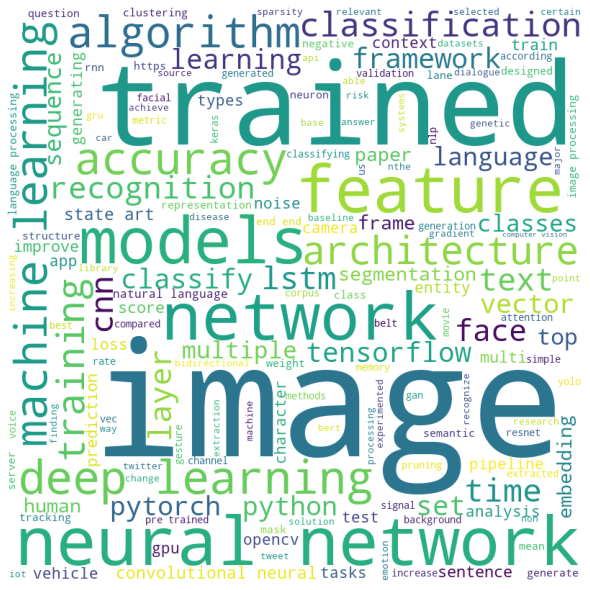

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

50

In [ ]:
list5

['android app driving collecting smart phone sensors like accelerometer gps gyroscope unsafe harsh driving k means clustering algorithm found thresholds events brake acceleration left turn right turn thresholds separate automata events automata time basis accuracy around android studio java',
 'android app driving collecting smart phone sensors like accelerometer gps gyroscope unsafe harsh driving k means clustering algorithm found thresholds events brake acceleration left turn right turn thresholds separate automata events automata time basis accuracy around android studio java',
 'uf fc time streaming shot remote control robot vr format android uf fc robot controlled mobile uf fc finalist yantra yantra ideas competition iit bombay uf fc presented anveshan',
 'distributed database front end insert view delete patient nfragmented tables distributing state wise sqlplus oracle db php javascript w css',
 'web disease basis symptoms selected api accessed web',
 'website showcase photograph

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
2         android  0.175993
6             app  0.159905
54        website  0.104233
49       software  0.078138
32         module  0.077341
5             api  0.071125
16            end  0.070278
25           java  0.069289
11            css  0.055698
3     android app  0.055601
23       html css  0.049402
22           html  0.049402
13       database  0.044285
40            php  0.043231
27           like  0.042471
10        control  0.041994
53           time  0.041033
33          mysql  0.039525
44          robot  0.039296
21          helps  0.038108
26     javascript  0.037692
46         server  0.036783
29           maps  0.035919
41      php mysql  0.035671
36  ntechnologies  0.034132
14         degree  0.032653
39          phone  0.031933
52       students  0.031712
0        advanced  0.029858
15        driving  0.028432

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of android is : 43
Frequency of app is : 31
Frequency of driving is : 6
Frequency of collecting is : 2
Frequency of smart is : 3
Frequency of phone is : 6
Frequency of sensors is : 2
Frequency of like is : 7
Frequency of accelerometer is : 2
Frequency of gps is : 3
Frequency of gyroscope is : 2
Frequency of unsafe is : 2
Frequency of harsh is : 2
Frequency of k is : 2
Frequency of means is : 2
Frequency of clustering is : 2
Frequency of algorithm is : 3
Frequency of found is : 2
Frequency of thresholds is : 4
Frequency of events is : 4
Frequency of brake is : 2
Frequency of acceleration is : 2
Frequency of left is : 2
Frequency of turn is : 4
Frequency of right is : 2
Frequency of separate is : 2
Frequency of automata is : 4
Frequency of time is : 7
Frequency of basis is : 3
Frequency of accuracy is : 2
Frequency of around is : 2
Frequency of studio is : 2
Frequency of java is : 10
Frequency of uf is : 4
Frequency of fc is : 4
Frequency of streaming is : 6
Frequency of shot i

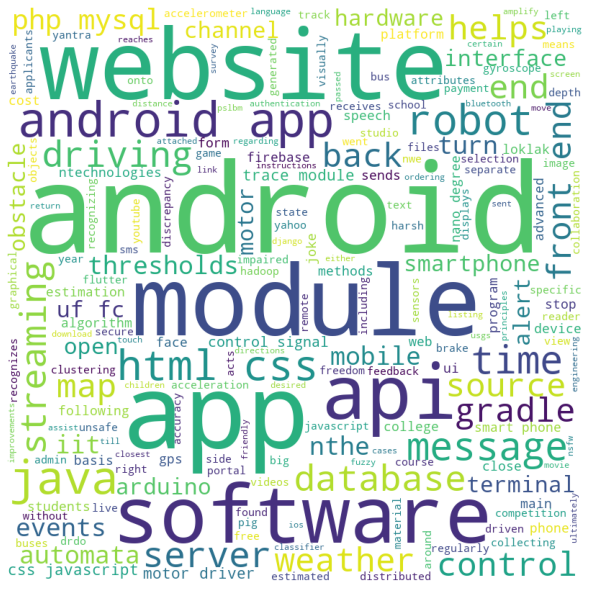

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 